In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)

num_steps = 300          # Total number of steps in the Markov chain
initial_x = 5            # Initial value x[1] = 5
phi = 0.9                # Coefficient for x[k]
sigma_v = np.sqrt(0.19)  # Standard deviation of v[k]

x = np.zeros(num_steps)
x[0] = initial_x

# Generate random noise v[k] ~ N(0, 0.19)
v = np.random.normal(0, sigma_v, num_steps - 1)

# Simulate the Markov chain
for k in range(1, num_steps):
    x[k] = phi * x[k-1] + v[k-1]

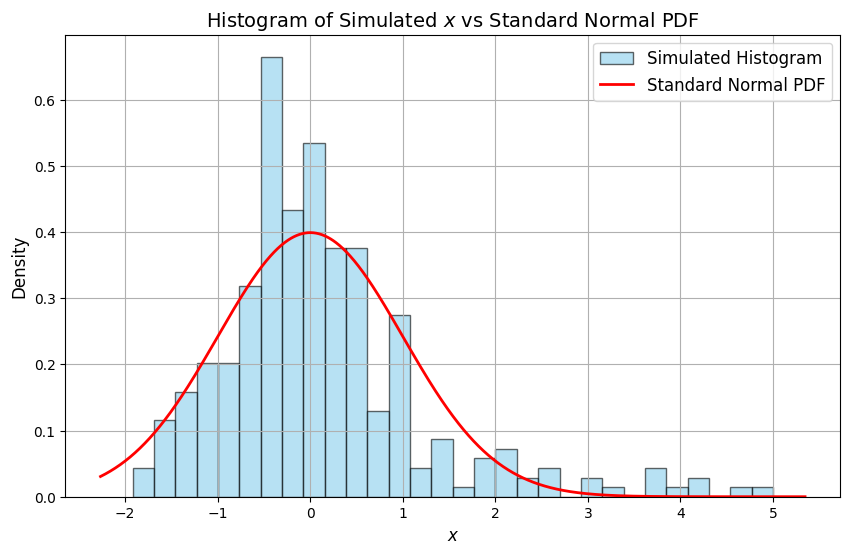

In [9]:
# 2. Histogram Plotting and Comparison

# Create a histogram of the simulated x values
plt.figure(figsize=(10, 6))
plt.hist(x, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Simulated Histogram')

# Overlay the standard normal PDF
xmin, xmax = plt.xlim()
x_vals = np.linspace(xmin, xmax, 1000)
plt.plot(x_vals, norm.pdf(x_vals, 0, 1), 'r', linewidth=2, label='Standard Normal PDF')

plt.title('Histogram of Simulated $x$ vs Standard Normal PDF', fontsize=14)
plt.xlabel('$x$', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

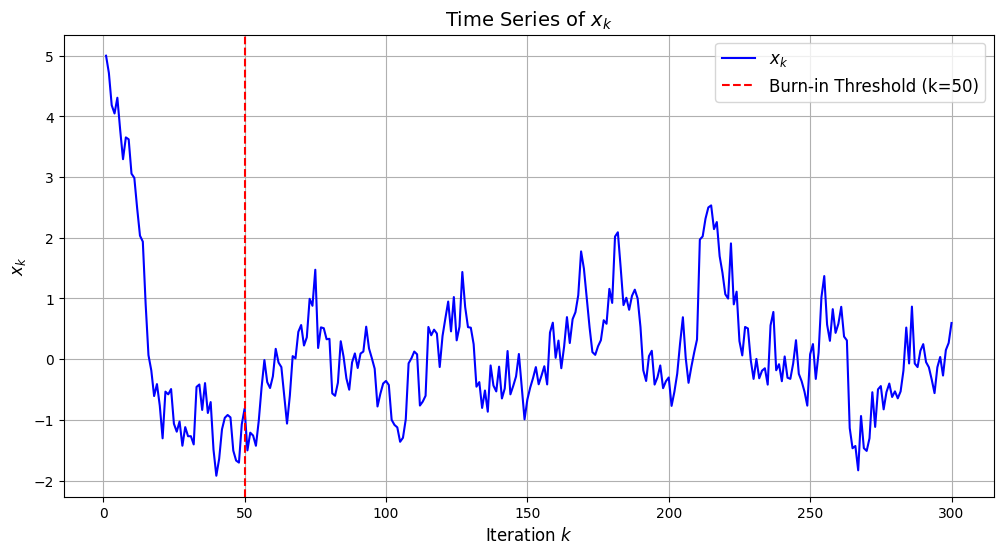

In [10]:
# 3. Time Series Plot and Burn-in Period Determination

# Plot the time series of x[k]
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_steps + 1), x, label='$x_k$', color='blue')

burn_in = 50
plt.axvline(x=burn_in, color='red', linestyle='--', label=f'Burn-in Threshold (k={burn_in})')

plt.title('Time Series of $x_k$', fontsize=14)
plt.xlabel('Iteration $k$', fontsize=12)
plt.ylabel('$x_k$', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [11]:
# Calculate and display mean and variance after burn-in

post_burn_in = x[burn_in:]
mean_post_burn_in = np.mean(post_burn_in)
variance_post_burn_in = np.var(post_burn_in)

print(f"Mean after burn-in (k > {burn_in}): {mean_post_burn_in:.4f}")
print(f"Variance after burn-in (k > {burn_in}): {variance_post_burn_in:.4f}")

Mean after burn-in (k > 50): 0.0750
Variance after burn-in (k > 50): 0.6161
